In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [2]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from src.grad_cam import make_gradcam_heatmap, save_and_overlay_gradcam


In [3]:
model = tf.keras.models.load_model("../models/mobilenetv2_finetuned.h5")
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [4]:
# For MobileNetV2
last_conv_layer_name = "Conv_1"


In [5]:
OUTPUT_DIR = Path("../reports/gradcam_examples")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


In [6]:
test_images = list(Path("../data/test/cats").glob("*.jpg"))[:3] + \
              list(Path("../data/test/dogs").glob("*.jpg"))[:3]


In [7]:
for img_path in test_images:
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    heatmap = make_gradcam_heatmap(
        img_array,
        model,
        last_conv_layer_name
    )

    output_path = OUTPUT_DIR / img_path.name
    save_and_overlay_gradcam(img_path, heatmap, output_path)

    print(f"Saved Grad-CAM: {output_path.name}")


Saved Grad-CAM: cat.10001.jpg
Saved Grad-CAM: cat.10004.jpg
Saved Grad-CAM: cat.10012.jpg


c:\Users\rakes\cats-vs-dogs-transfer-learning\src\grad_cam.py:41: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


Saved Grad-CAM: dog.0.jpg
Saved Grad-CAM: dog.10005.jpg
Saved Grad-CAM: dog.10010.jpg


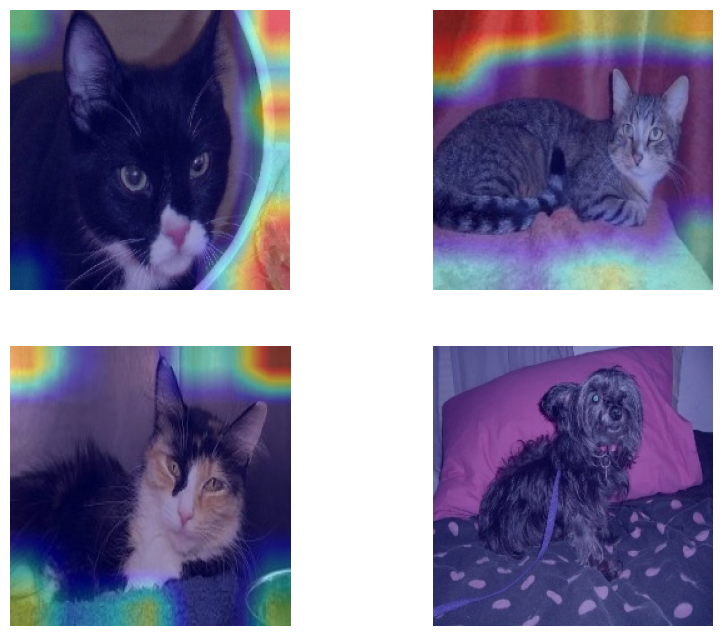

In [8]:
from PIL import Image

sample_images = list(OUTPUT_DIR.glob("*.jpg"))[:4]

plt.figure(figsize=(10,8))
for i, img_path in enumerate(sample_images):
    plt.subplot(2,2,i+1)
    plt.imshow(Image.open(img_path))
    plt.axis("off")
plt.show()


### Grad-CAM Interpretability

Grad-CAM was applied to visualize the regions of input images that most strongly
influenced the model’s predictions. The generated heatmaps indicate that the
model focuses on relevant object regions such as the animal’s face and body,
confirming meaningful feature learning.
